# Image Augmentation

### Objectives
Create greater set of images for training

### Inputs
- inputs/mildew_dataset/cherry-leaves/test
- inputs/mildew_dataset/cherry-leaves/train
- inputs/mildew_dataset/cherry-leaves/validation

### Outputs
- Image Augmentation
- Image distribution plots for validation, train and test sets
- Saved trained and fitted ML model
- Learning curve plot for model performance
- Saved model evaluation pickle file
- Prediction on a random image file

## Set Directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print(current_dir)

/workspaces/mildew-detector/jupyter_notebooks


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detector'

## Import Packages

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Input and Output Directories

Note - Check my_data_dir points to correct folder, change for resized images

In [5]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves/resized'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

print('train path', train_path)
print('validation path', val_path)
print('test path', test_path)
current_dir

train path inputs/mildew_dataset/cherry-leaves/resized/train
validation path inputs/mildew_dataset/cherry-leaves/resized/validation
test path inputs/mildew_dataset/cherry-leaves/resized/test


'/workspaces/mildew-detector'

### Note

Make sure version in below is set to correct folder

In [6]:
version = 'v2'
file_path = f'outputs/{version}'
current_dir

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['powdery_mildew', 'healthy']


## Set Image Shape

### Note - Check version 

In [8]:
## Import saved image shape embedding
import joblib
version = 'v2'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

## Number of images in train, test and validation data

Note - version will be taken from cell above

/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(


* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images


/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(
/tmp/ipykernel_639/2624712217.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_freq = df_freq.append(


* test - powdery_mildew: 422 images
* test - healthy: 422 images




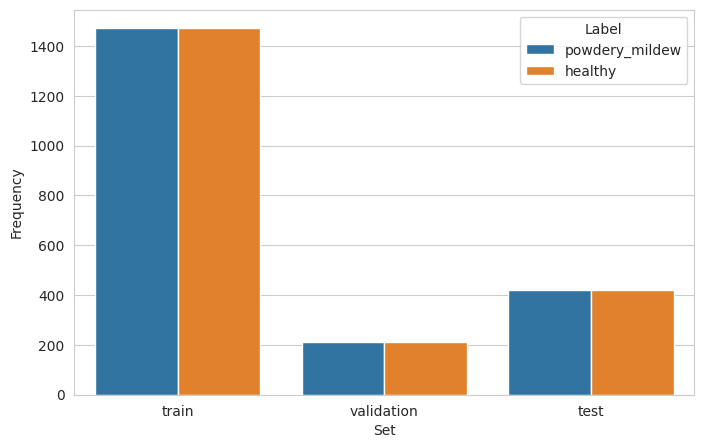

In [17]:
version
file_path = f'outputs/{version}'

df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()


### Data Split as Pie Chart

In [14]:
def pie_chart():
    file_path = f'outputs/{version}'
    print(file_path)
    color = sns.color_palette('bright')
    x = 0

    healthy_temp = []
    mildew_temp = []
    folders = ['train', 'validation', 'test']

    for label in labels:
        
        for folder in ['train', 'validation', 'test']:

            print("folder", folder)
            if label == 'healthy':
                print("label", label)
                data = int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
                healthy_temp.append(data)
            else:
                data = int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
                mildew_temp.append(data)
            
        if label == 'healthy':
            plt.pie(healthy_temp, labels=folders, colors=color, autopct='%1.1f%%', shadow=True)
            plt.legend(title="Healthy Images Distribution")
            plt.savefig(f'{file_path}/healthy_labels_distribution_pie.png',
            bbox_inches='tight', dpi=150)
            plt.show()
        else:
            plt.pie(mildew_temp, labels=folders, colors=color, autopct='%1.1f%%', shadow=True)
            plt.legend(title="Powdery Mildew Images Distribution")
            plt.savefig(f'{file_path}/mildew_labels_distribution_pie.png',
            bbox_inches='tight', dpi=150)
            plt.show()
            

    print("2nd test", healthy_temp)
    print("3rd", mildew_temp)
    return healthy_temp, mildew_temp

outputs/v2
folder train
folder validation
folder test


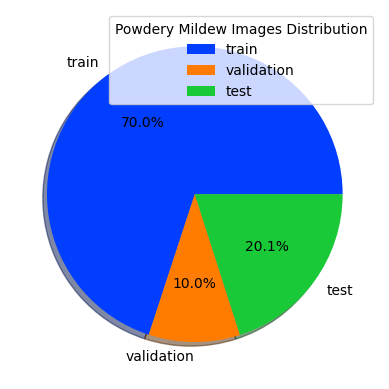

folder train
label healthy
folder validation
label healthy
folder test
label healthy


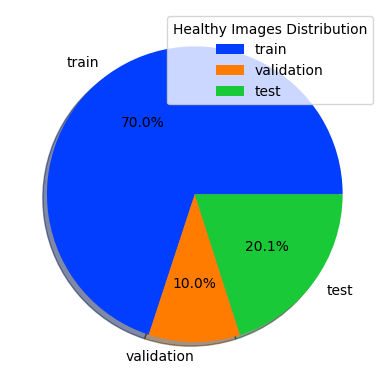

2nd test [1472, 210, 422]
3rd [1472, 210, 422]


([1472, 210, 422], [1472, 210, 422])

In [15]:
pie_chart()

## Image Data Augmentation

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

#### Augment Training Images

In [24]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment Validation Images

In [25]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices


Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment Test Images

In [22]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices


Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot of Augmented Training Images

In [11]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

NameError: name 'train_set' is not defined

## Plot of Augmented Validation and Test Images

In [21]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


NameError: name 'validation_set' is not defined

## Save class_indices

In [24]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

## Model Creation

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [10]:

def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


#### Model Summary

In [13]:
create_tf_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)             

#### Early Stopping Condition

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Model Fitting

In [25]:
model = create_tf_model()
model.fit(train_set,
          epochs=15,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )


2024-04-18 10:15:03.728145: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
147/147 [==============================] - 195s 1s/step - loss: 0.2996 - accuracy: 0.8687 - val_loss: 0.0790 - val_accuracy: 0.9833
Epoch 2/15
147/147 [==============================] - 185s 1s/step - loss: 0.0924 - accuracy: 0.9706 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/15
147/147 [==============================] - 177s 1s/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 4/15
147/147 [==============================] - 189s 1s/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/15
147/147 [==============================] - 180s 1s/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0041 - val_accuracy: 0.9976


In [26]:
model.save('outputs/v2/mildew_detector_model.h5')

## Model Performance

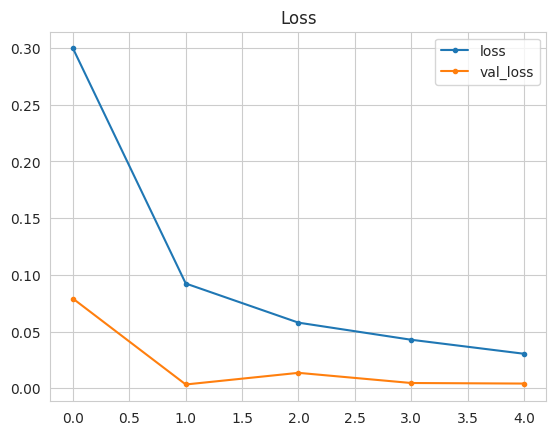

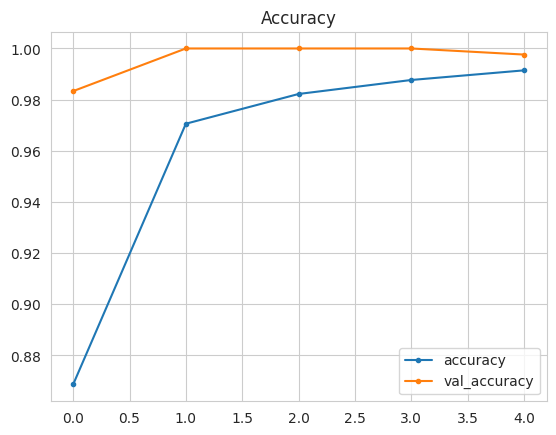

In [27]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()


## Model Evaluation

Check version and file path

In [28]:
from keras.models import load_model
model = load_model('outputs/v2/mildew_detector_model.h5')

In [29]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 12s 277ms/step - loss: 0.0063 - accuracy: 0.9988


## Evaluation Pickle

In [30]:
joblib.dump(value=evaluation,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

## Predict on New Data

Image shape: (100, 100), Image mode: RGB


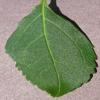

In [12]:
from tensorflow.keras.preprocessing import image

pointer = 1
label = labels[1]  # select Powdery Mildew or Healthy

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


In [32]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 100, 100, 3)


Prediction on class probabilities

In [33]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9331994
powdery_mildew


This is a random section to remind me to save and commit, push etc